In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import s3fs
import yaml
import numpy as np
import fireducks.pandas as pd
import warnings
from dotenv import load_dotenv

sys.path.append("../src")
from topic_modeling import *

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 59.1 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
load_dotenv()
pd.set_option("display.max_columns", None)
warnings.simplefilter("ignore")
fs = s3fs.S3FileSystem(
            client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"},
            key=os.environ["Accesskey"],
            secret=os.environ["Secretkey"],
            token=os.environ["Token"]
)

# Data selection : only rejected internships

In [4]:
with fs.open("elissamim/text_classification_men/data/stages-votes.json", "r") as file:
    df = pd.read_json(file)

df = df[df["sol"]=="ko"]
docs = df["phrase_text"].tolist()

# LDA

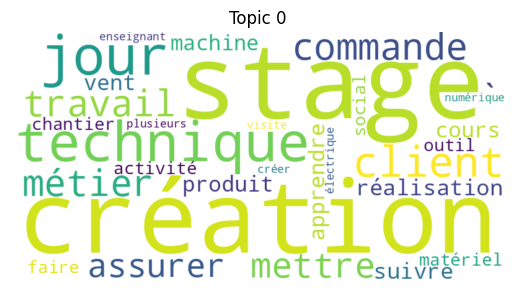

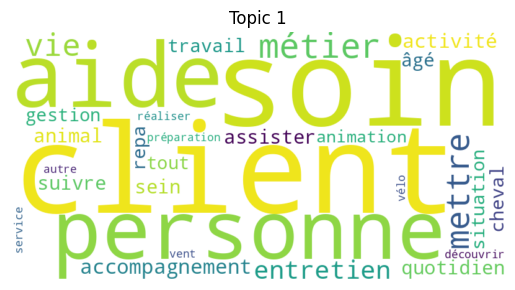

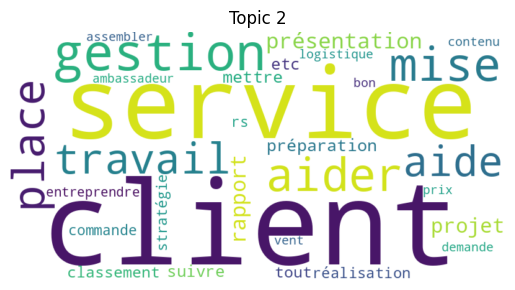

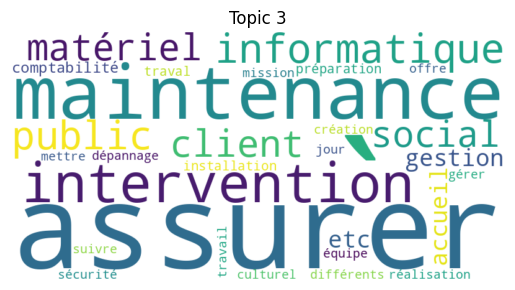

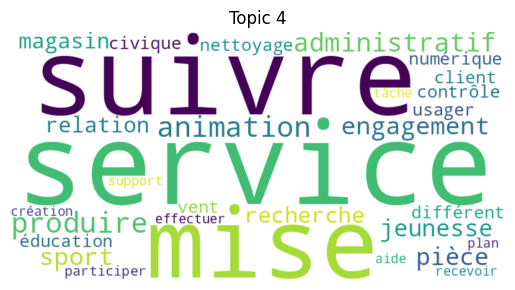

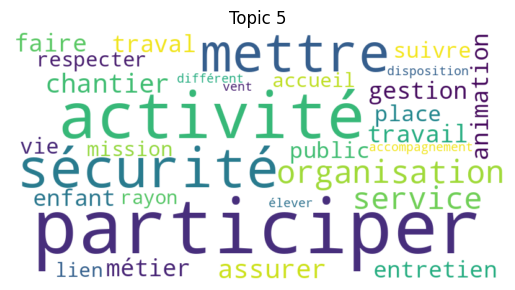

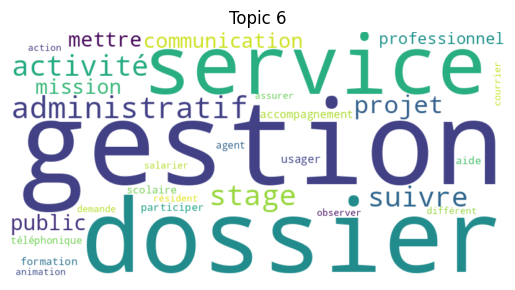

In [5]:
lda_model = LDATopicModeling(docs).find_best_lda_model()
LDATopicModeling(docs).plot_word_clouds(lda_model)

# NMF

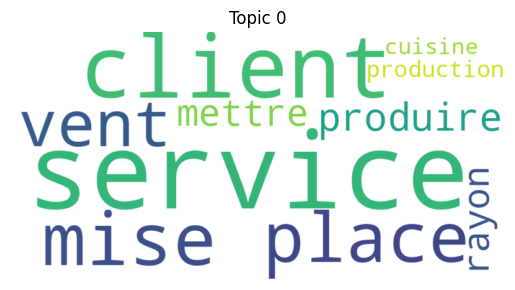

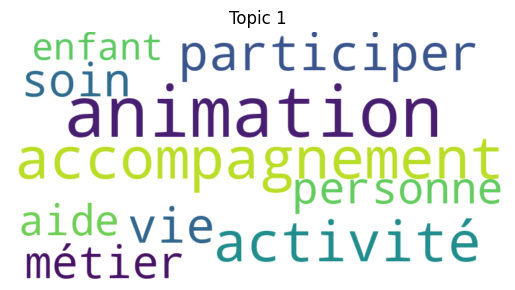

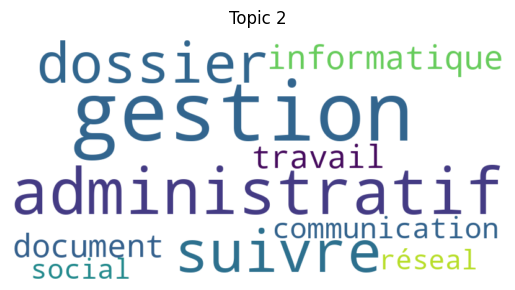

In [6]:
nmf_model = NMFTopicModeling(docs)
nmf_model.plot_word_clouds()

# LSA 

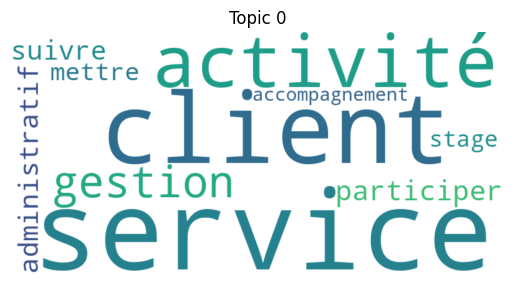

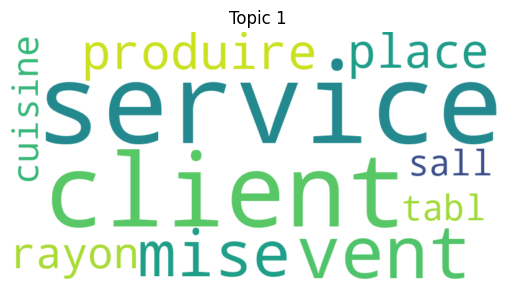

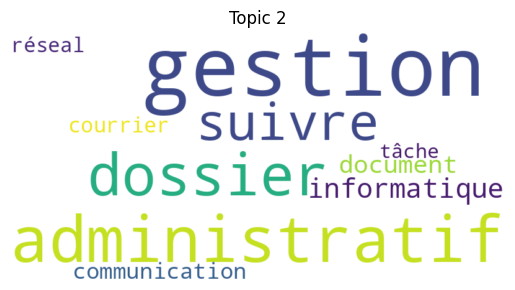

In [7]:
lsa_model = LSATopicModeling(docs)
lsa_model.plot_word_clouds()